In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
air_quality = pd.read_csv("air_quality_no2_long.csv")

In [4]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [5]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [6]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [7]:
air_quality["datetime"]

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: object

This proves that the datetime is saved as an oject or as plain text and not a UTC time.

In [8]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [9]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Originally the values in datetime are character strings and do not provide any datetime operations.

The to_datetime object is invaluable because it helps change text to a datetime object.

In [10]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [11]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [12]:
air_quality["month"] = air_quality["datetime"].dt.month

In [13]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


labled in order according to the corresponding month. thanks to the dt.month accessor in this case june as it follows. 

In [16]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"]
)["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Star think back to the split apply and combine pattern provided by groupby from tutorial on stats cal.

Monday = 0 Sunday = 6

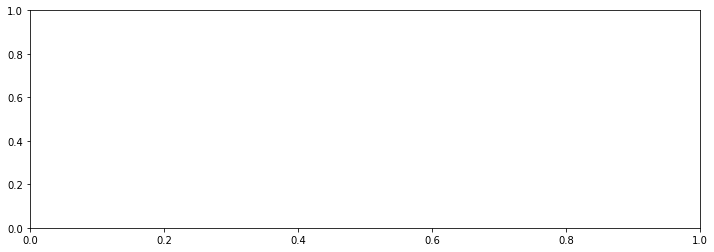

In [17]:
fig, axs = plt.subplots(figsize=(12, 4))

In [18]:
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

<AxesSubplot:xlabel='datetime'>

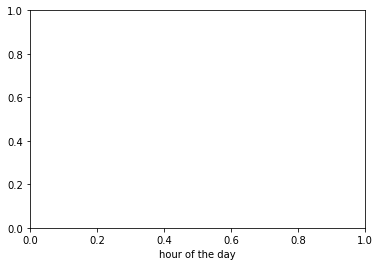

In [19]:
plt.xlabel("hour of the day");

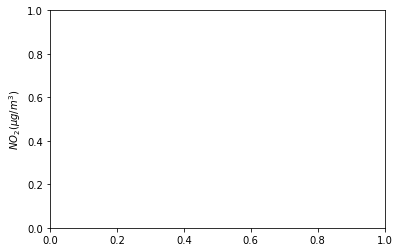

In [20]:
plt.ylabel("$NO_2 (µg/m^3)$");


In [21]:
no_2["2019-05-20":"2019-05-21"].plot();


NameError: name 'no_2' is not defined